## CIT3720 - Assignment 5


#### Fall 2024

Name - Marlond Augustin

<font color='lightblue'>Please copy this assignment to your Google Drive and populate the Google Colab notebook with your answers. Please hand in the .ipynb file in Moodle or share the link with me </font>

In this assignment, we will interact with an unsupervised learning model.

You will be graded on your answers to the assignment questions, but to receive full credit you must use python to filter & manipulate the dataframe to help you answer the question. Please populate the code block associated with each question. For answers that require longer explanation, please include your answers in a python code block. See below.

```python
list_len = [ .. ]
print(f"There are {len(list_len)} items in the list")
"""
Here I can provide longer answer if required

"""

```

In [ ]:
"""
Download Mall Data from GitHub and save it as a dataframe
"""
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/rafalbielech/CIT3720/refs/heads/main/Data/Mall_Customers.csv")
shape = df.shape
print(f"The downloaded dataframe is {shape[0]} by {shape[1]}")
df

The downloaded dataframe is 200 by 5


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Question 1

* In this dataset, we are interested in identifying if there is an correlation between age and spending. Spedning is denoted as spending score (1-100) in our data. Before we get started, please visualize the dataset between age and spending score so we can visually inspect the data.
* Please add a comment about how many clustes you think exist in the data

## Hint -
* Scatter plot from Matplot lib is the most appropriate tool for this!



<Axes: xlabel='Age', ylabel='Spending Score'>

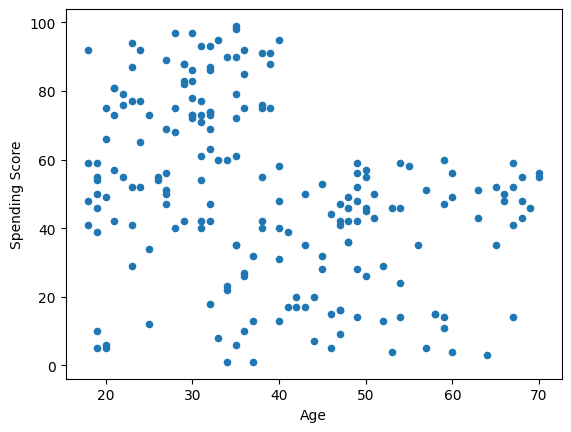

In [ ]:
"""
Answer - Question 1
"""
df_full = pd.concat([df['Age'], df['Spending Score (1-100)']], axis=1)
df_full.columns = ['Age','Spending Score']
# I believe that there will be at least 5 different clusters, my guess is that they will contain either the age ranges or, different spending ranges
#for example I expect the first to be from 18 to 30 years old, if it's the spending range the first would be from 0 to 20
df_full.plot.scatter(x="Age",y="Spending Score")

## Question 2

* We are now going to try parameter tuning for the K-means algorithm by evaluating several # of clustes and determining which one is the most optimal.
* We saw that inertia is one way of measuring the performance of clustering algorithm

## Hint -
* We will want to iterate through a loop of possible # of clusters and call the Kmeans model with the value of the list at index i
* KMeans(n_clusters = <X> ,init='k-means++', n_init = 10) can be used in a loop.
* Save each model's inertia into a new dictionary with its respective # of clustes applied and its model centers.
** sample output
```
{
  2 : {
    "inertia" : 4342342,
    "centers" : [ ... ]
  },
  3 : {
    "inertia" : 22323,
    "centers" : [ ... ]
  }
}

```



In [ ]:
"""
Answer - Question 2
"""
from sklearn.cluster import KMeans
kmeans_dict = {}

km = KMeans(n_clusters=6, random_state=42)
selected_columns = ['Age','Spending Score (1-100)']
km = km.fit(df[selected_columns])
"""
# Get cluster assignments
labels = km.labels_

# Visualize the results
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=labels)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
"""
for clust in range(1,6):
    km = KMeans(n_clusters=clust,init='k-means++', random_state=42)
    km = km.fit(df[selected_columns])
    kmeans_dict[clust] = pd.Series({
        "inertia" : km.inertia_,
        "centers" : km.cluster_centers_
    })

kmeans_dict

{1: inertia           171535.5
 centers    [[38.85, 50.2]]
 dtype: object,
 2: inertia                                          75949.15601
 centers    [[28.952941176470574, 73.62352941176468], [46....
 dtype: object,
 3: inertia                                         45840.676616
 centers    [[43.054945054945044, 47.78021978021978], [29....
 dtype: object,
 4: inertia                                         28165.583567
 centers    [[55.70833333333332, 48.229166666666664], [30....
 dtype: object,
 5: inertia                                         23951.044341
 centers    [[55.978723404255305, 48.51063829787234], [28....
 dtype: object}

## Question 3

* What is the optimal # of clusters in our dataset?
* Create an elbow chart that visualizes the inertia that was achieved with each # of clusters that you explored.

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Inertia')]

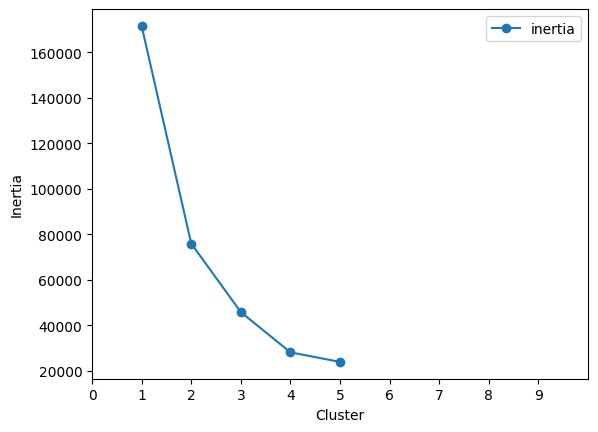

In [ ]:
"""
Answer - Question 3
"""
plot_data = (pd.concat(kmeans_dict, axis=1)
             .T
             [['inertia']]
             )

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,10,1))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia')

## Question 4

* For the model that has performed best, please visualize the scatter plot once again but also include the group centeroids in red so we can visually see how well the model performed on our dataset.

## Hint -

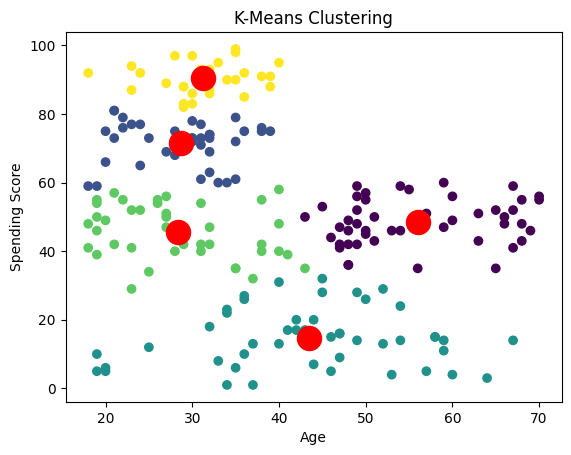

In [ ]:
"""
Answer - Question 4
"""
labels = km.labels_

# Visualize the results
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=labels)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red')
plt.show()